# WEB SCRAPING NIH - PubMed Central 

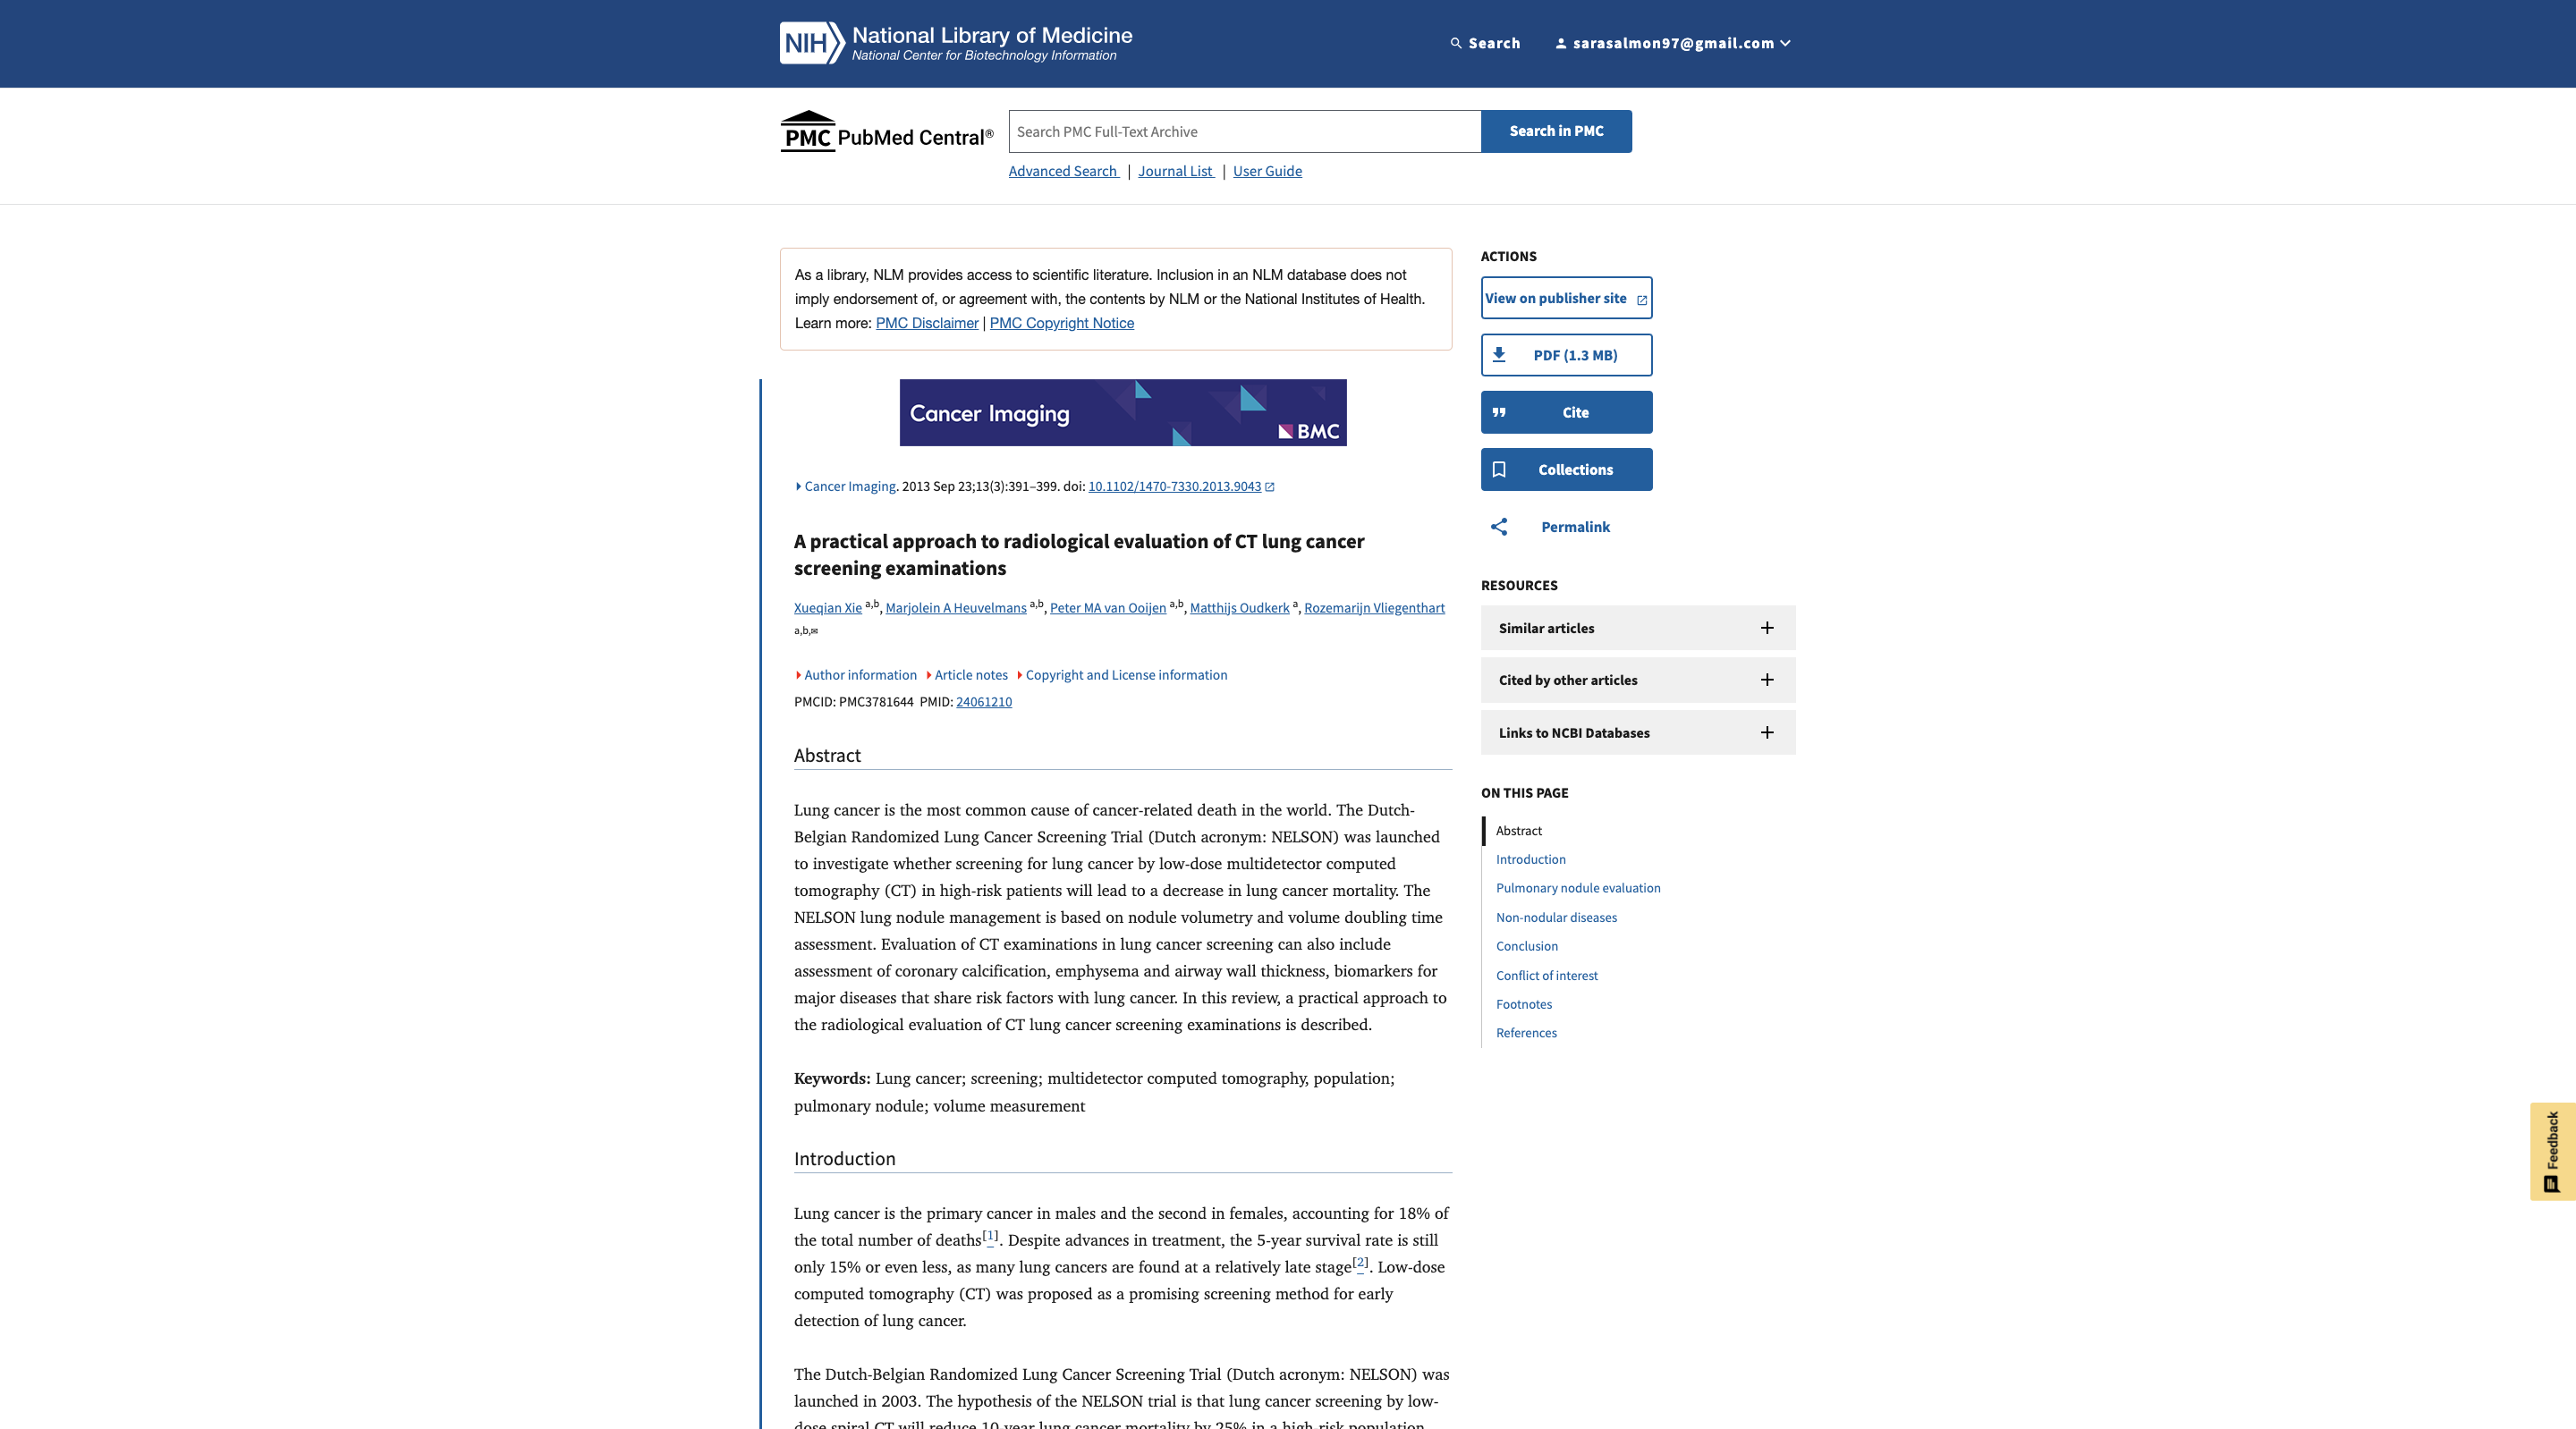

In [3]:
from IPython.display import Image, display

# Ruta a la imagen
image_path = '/Users/sarasalmon/Desktop/PubMed.png'
display(Image(filename=image_path))

In [7]:
import pandas as pd
import time # Funciones relacionadas con el tiempo, por ej.pausar ejecución del programa durante un período específico
import requests # Realiza solicitudes HTTP; para descargar contenido de páginas web o interactuar con APIs
import os # Interactua con el sistema operativo, para manejar archivos y directorios


from bs4 import BeautifulSoup # Analiza documentos HTML y XML y extrae información de páginas web
from selenium import webdriver # Para controlar navegadores web a través de Python. Permite automatizar interacciones en páginas web
from selenium.webdriver.chrome.service import Service # Para configurar y manejar el servicio del navegador Chrome- iniciar y detener el controlador de Chrome
from webdriver_manager.chrome import ChromeDriverManager # Permite gestionar automáticamente la instalación del controlador de Chrome - versión correcta del controlador
from selenium.webdriver.chrome.options import Options  # Permite configurar opciones para el navegador Chrome (ejecutar el navegador en modo sin cabeza, configurar tamaños de ventana, etc.)
from selenium.common.exceptions import WebDriverException # Para manejar excepciones específicas que pueden ocurrir al usar Selenium- si hay problemas al iniciar el navegador o al cargar una página
from IPython.display import HTML # Permite mostrar contenido HTML en un Jupyter Notebook o un entorno interactivo de IPython
from urllib.parse import urlparse, parse_qs # Funciones para analizar URLs. 
#urlparse descompone una URL en sus componentes (como esquema, dominio, etc.)
# y parse_qs convierte la cadena de consulta (query string) en un diccionario que puedes usar para extraer parámetros de la URL


# Configuramos las opciones del navegador
options = Options()
# Usamos --headless para que no aparezca la ventana del navegador
options.add_argument("--headless") 

try:
    # Instalación y Configuración del Driver
    # Utilizamos ChromeDriverManager para instalar automáticamente el controlador de Chrome y crear una instancia del navegador.
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options) 
    

    # Navega a la URL deseada
    # driver.get(url) navega a la página especificada en la URL
    url = "https://pmc.ncbi.nlm.nih.gov/articles/PMC3781644/"  
    driver.get(url)

    # Espera 5 segundos para asegurarse de que la página se haya cargado completamente
    time.sleep(5)

    # Imprime el título de la página
    print(driver.title)

    # Se utiliza BeautifulSoup para analizar el HTML que ha sido cargado en el navegador
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    print(soup.prettify())  # Toma el HTML y lo formatea con indentación para que sea más fácil de leer

# Si hay un error al abrir el navegador, se detecta la excepción e imprime un mensaje de error
except WebDriverException as e:
    print(f"Error al abrir el navegador: {e}")
finally:
    driver.quit()

A practical approach to radiological evaluation of CT lung cancer screening examinations - PMC
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="True" name="HandheldFriendly"/>
  <meta content="320" name="MobileOptimized"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/static/assets/style-70b9163a.css" rel="stylesheet"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-DP2X732JSX&amp;l=pingerDataLayer&amp;cx=c" type="text/javascript">
  </script>
  <script async="" id="pingerInjectedGTM" src="https://www.googletagmanager.com/gtm.js?id=GTM-PC9B6M3&amp;l=pingerDataLayer">
  </script>
  <script crossorigin="" src="/static/assets/base_style-ec2bc71e.js" type="module">
  </script>
  <link href="/static/assets/style-ef962842.css" rel="stylesheet"/>
  <link href="/static/assets/style-3ade8b5c.css" rel="stylesheet"/>
  <script crossorigin="" src="/static/as

In [ ]:
# Hacemos la llamada a la página web
response = requests.get(url)
response.status_code # 200 BIEN!! :)

In [3]:
# Extraemos el título del artículo
title = soup.find('h1').get_text(strip=True)  
title

'A practical approach to radiological evaluation of CT lung cancer screening examinations'

In [4]:
# Extraemos el abstract del artículo
meta_description= soup.find_all('p')

# Extraemos el abstract del artículo indicando dónde se encuentra
abstract_text = meta_description[8].get_text()  
print(f"Título: {title}")
print(f"Abstract: {abstract_text}")

Título: A practical approach to radiological evaluation of CT lung cancer screening examinations
Abstract: Lung cancer is the most common cause of cancer-related death in the world. The Dutch-Belgian Randomized Lung Cancer Screening Trial (Dutch acronym: NELSON) was launched to investigate whether screening for lung cancer by low-dose multidetector computed tomography (CT) in high-risk patients will lead to a decrease in lung cancer mortality. The NELSON lung nodule management is based on nodule volumetry and volume doubling time assessment. Evaluation of CT examinations in lung cancer screening can also include assessment of coronary calcification, emphysema and airway wall thickness, biomarkers for major diseases that share risk factors with lung cancer. In this review, a practical approach to the radiological evaluation of CT lung cancer screening examinations is described.


In [5]:
# Crear un directorio para guardar las imágenes
os.makedirs('imagenes_pubmed', exist_ok=True)

In [6]:
# Buscamos individualmente el link que necesitamos para después aplicarlo al bucle
link1 = soup.find('figure', id='F1').find('img').get('src')
link1

'https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/7137694fa828/ci13904301.jpg'

In [7]:
# Aplicamos la misma lógica para todas las imágenes del artículo, interando sobre el índice de estas

images_link=[]

for i in range(1,10):
    indice = f"F{i+1}"
    link = soup.find('figure', id=indice).find('img').get('src')
    print(link)
    images_link.append(link)
images_link

# Da un error que se podría solucionar con la estructura de error handling:

# images_link = []

# for i in range(1, 10):
    #indice = f"F{i+1}"
    #link = soup.find('figure', id=indice)  # Buscamos el tag <figure>
    
    #if figure_tag is not None:  # Verificamos si <figure> fue encontrado
        # img_tag = figure_tag.find('img')  # Buscamos la imagen dentro de <figure>
        # if img_tag is not None:  # Verificamos si <img> fue encontrado
            # link = img_tag.get('src')
            # print(link)
            # images_link.append(link)
        # else:
            # print(f"No se encontró imagen en <figure> con id '{indice}'")
    # else:
        # print(f"No se encontró <figure> con id '{indice}'")

# print(images_link)

https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/21130882c20d/ci13904302.jpg
https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/b5b76b553dd0/ci13904303.jpg
https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/7da9b70aa44a/ci13904304.jpg
https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/a0bf3c180885/ci13904305.jpg
https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/4f7d9e5231f5/ci13904306.jpg
https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/4f02ff52818d/ci13904307.jpg
https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/140875c5b04a/ci13904308.jpg


AttributeError: 'NoneType' object has no attribute 'find'

In [8]:
# Creamos el DataFrame con la información obtenida: Título, Abstract y las imágenes del artículo

dictionary = {"title": title,
                 "abstract": abstract_text,
                 "images": images_link}
article_df = pd.DataFrame(data = dictionary)
article_df

,title,abstract,images
0,A practical approach to radiological evaluatio...,Lung cancer is the most common cause of cancer...,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...
1,A practical approach to radiological evaluatio...,Lung cancer is the most common cause of cancer...,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...
2,A practical approach to radiological evaluatio...,Lung cancer is the most common cause of cancer...,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...
3,A practical approach to radiological evaluatio...,Lung cancer is the most common cause of cancer...,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...
4,A practical approach to radiological evaluatio...,Lung cancer is the most common cause of cancer...,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...
5,A practical approach to radiological evaluatio...,Lung cancer is the most common cause of cancer...,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...
6,A practical approach to radiological evaluatio...,Lung cancer is the most common cause of cancer...,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...


In [ ]:
# Como así queda muy poco estético, intentamos hacer un dataframe en el que las dos primeras columnas solo tengan 1 fila
# Y la ultima columna tenga 4 filas

In [10]:
# Creamos un nuevo DataFrame para Columna 1 y Columna 2, manteniendo sólo la primera fila de estas
new_data = {
    # Establecemos que para la columna 'title', la primera fila incluya el contenido de 'title' y el resto las deje vacías
    'title': [article_df['title'].iloc[0]] + [''] * (len(article_df) - 1), 
    # Establecemos que para la columna 'abstract', la primera fila incluya el contenido de 'abstract' y el resto las deje vacías
    'abstract': [article_df['abstract'].iloc[0]] + [''] * (len(article_df) - 1), 
     # Establecemos que para la columna 'images', complete todas las filas con las imagenes que hay
    'images': article_df['images']                                  
}

final_df = pd.DataFrame(new_data)
final_df

,title,abstract,images
0,A practical approach to radiological evaluatio...,Lung cancer is the most common cause of cancer...,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...
1,,,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...
2,,,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...
3,,,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...
4,,,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...
5,,,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...
6,,,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/37...


In [12]:
# Importamos la libreria de HTML para poder insertar contenido HTML directamente en nuestro entorno de Jupyter
from IPython.display import HTML

# Función que devuelve la etiqueta HTML <img> con el enlace de la imagen
def show_image(url):
    return f'<img src="{url}" width="10000"/>'

# Aplicamos la función y crear una nueva columna con la imagen incluida
final_df['image'] = final_df['images'].apply(show_image)

# Mostramos el DataFrame con imágenes usando HTML
article_df_html= HTML(final_df.to_html(escape=False))
article_df_html

,title,abstract,images,image
0,A practical approach to radiological evaluation of CT lung cancer screening examinations,"Lung cancer is the most common cause of cancer-related death in the world. The Dutch-Belgian Randomized Lung Cancer Screening Trial (Dutch acronym: NELSON) was launched to investigate whether screening for lung cancer by low-dose multidetector computed tomography (CT) in high-risk patients will lead to a decrease in lung cancer mortality. The NELSON lung nodule management is based on nodule volumetry and volume doubling time assessment. Evaluation of CT examinations in lung cancer screening can also include assessment of coronary calcification, emphysema and airway wall thickness, biomarkers for major diseases that share risk factors with lung cancer. In this review, a practical approach to the radiological evaluation of CT lung cancer screening examinations is described.",https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/21130882c20d/ci13904302.jpg,
1,,,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/b5b76b553dd0/ci13904303.jpg,
2,,,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/7da9b70aa44a/ci13904304.jpg,
3,,,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/a0bf3c180885/ci13904305.jpg,
4,,,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/4f7d9e5231f5/ci13904306.jpg,
5,,,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/4f02ff52818d/ci13904307.jpg,
6,,,https://cdn.ncbi.nlm.nih.gov/pmc/blobs/ef93/3781644/140875c5b04a/ci13904308.jpg,


###### CONCLUSIÓN: Podríamos guardar las imágenes que nos interesasen, que son las de las filas 0,1,2 y 5. Sin embargo, es mucho más eficiente hacer un barrido general de las imágenes directamente de la National Library of Medicine.
### Próximos pasos: Web Scrapping de las imágenes de la NIH - National Library of Medicine